Loading references as previously extracted:

In [2]:
references = pd.read_csv('data/References.csv', index_col=0)

In [3]:
references.head()

,ref,file,ref_parsed,year,identifier
0,"Lave, J., & Wenger, E. (1991). Situated learni...",import2018_371,"Lave, J., & Wenger, E. (1991)",1991.0,"Lave, J., & Wenger, E. (1991). Situated learni..."
1,"Miles, M. B., Huberman, A. M., & Saldana, J. (...",import2018_371,"Miles, M. B., Huberman, A. M., & Saldana, J. (...",2013.0,"Miles, M. B., Huberman, A. M., & Saldana, J. (..."
2,"Pea, R. D., Gomez, L. M., Edelson, D. C., Fish...",import2018_371,"Pea, R. D., Gomez, L. M., Edelson, D. C., Fish...",1997.0,"Pea, R. D., Gomez, L. M., Edelson, D. C., Fish..."
3,"Rogoff, B. (1995). Observing sociocultural act...",import2018_371,"Rogoff, B. (1995)",1995.0,"Rogoff, B. (1995). Observing sociocultural act..."
4,"Shirk, J., Ballard, H., Wilderman, C., Phillip...",import2018_371,"Shirk, J., Ballard, H., Wilderman, C., Phillip...",2012.0,"Shirk, J., Ballard, H., Wilderman, C., Phillip..."


Some sample references, and their corresponding identifier:

In [4]:
sample = references[['ref', 'identifier']].sample(4)
[print("ref: ",r, '\nidentifier: ', s,) for r, s in zip(sample.ref.tolist(), sample.identifier.tolist())]

ref:  Savage, J. (2005). Working towards a theory for music technologies in the classroom: How pupils engage with and organize sounds with new technologies. British Journal of Music Education, 2, 167-180. 
identifier:  Savage, J. (2005). Working towards a theory for music technologies in the classroom: How pupils engage with and organize sounds with new technologies
ref:  Wake, J.D. & Wasson, B. (2011). Supporting creativity in teaching and learning of history through small-group production of mobile, location-based games In: Proceedings of mLearn 2011. 10th World Conference on Mobile and Contextual Learning, pp. 180-188. Beijing, China, 18-21 October 2011. 
identifier:  Wake, J.D. & Wasson, B. (2011). Supporting creativity in teaching and learning of history through small-group production of mobile, location-based games In: Proceedings of mLearn 2011
ref:  Cellar, D. F., Stuhlmacher, A. F., Young, S. K., Fisher, D. M., Adair, C. K., Haynes, S., … Riester, D. (2011). Trait Goal Orienta

[None, None, None, None]

### First we check the most cited citations:

Lave, J., & Wenger, E. (1991). Situated learning: Legitimate peripheral participation                                          32
Scardamalia, M. (2002). Collective cognitive responsibility for the advancement of knowledge                                   32
Jordan, B., & Henderson, A. (1995). Interaction analysis: Foundations and practice                                             31
Scardamalia, M., & Bereiter, C. (2006). Knowledge building: Theory, pedagogy, and technology                                   23
Papert, S. (1980). Mindstorms: Children, computers, and powerful ideas                                                         20
Barron, B. (2003). When smart groups fail                                                                                      19
Bereiter, C. (2002). Education and mind in the knowledge age                                                                   16
Vygotsky, L. S. (1978). Mind in society: The development of higher psychological processes

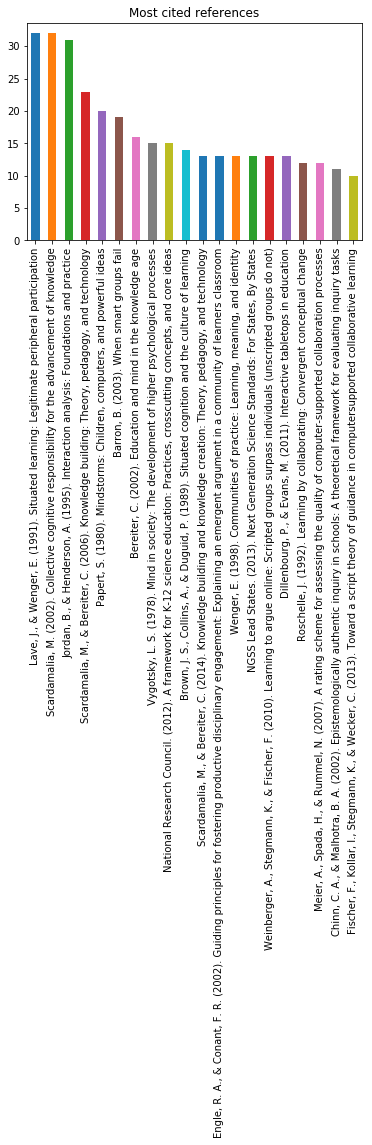

In [5]:
plt.title('Most cited references')
references.identifier.value_counts().head(20).plot(kind='bar')
references.identifier.value_counts().head(10)

### We look at how the references are distributed over the years:

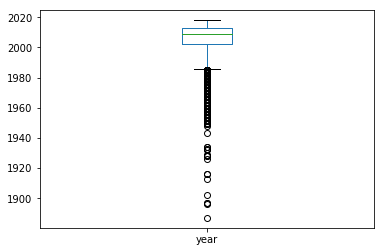

In [6]:
references.year.plot(kind='box')

### Looking at authors in dataset & the ones they reference

Load the metadata:

In [7]:
metadata = pd.read_csv('data/Parsed_metadata.csv', index_col=0)

In [8]:
reference_authors = pd.read_csv('data/Reference_authors.csv', index_col=0)
reference_authors.shape

(34668, 6)

In [9]:
reference_authors.drop_duplicates(inplace=True)
reference_authors.shape

(34644, 6)

In [10]:
reference_authors.head()

,ref,file,ref_parsed,year,identifier,author
0,"Lave, J., & Wenger, E. (1991). Situated learni...",import2018_371,"Lave, J., & Wenger, E. (1991)",1991.0,"Lave, J., & Wenger, E. (1991). Situated learni...",Lave J.
1,"Miles, M. B., Huberman, A. M., & Saldana, J. (...",import2018_371,"Miles, M. B., Huberman, A. M., & Saldana, J. (...",2013.0,"Miles, M. B., Huberman, A. M., & Saldana, J. (...",Miles M. B.
2,"Pea, R. D., Gomez, L. M., Edelson, D. C., Fish...",import2018_371,"Pea, R. D., Gomez, L. M., Edelson, D. C., Fish...",1997.0,"Pea, R. D., Gomez, L. M., Edelson, D. C., Fish...",Pea R. D.
3,"Rogoff, B. (1995). Observing sociocultural act...",import2018_371,"Rogoff, B. (1995)",1995.0,"Rogoff, B. (1995). Observing sociocultural act...",Rogoff B.
4,"Shirk, J., Ballard, H., Wilderman, C., Phillip...",import2018_371,"Shirk, J., Ballard, H., Wilderman, C., Phillip...",2012.0,"Shirk, J., Ballard, H., Wilderman, C., Phillip...",Shirk J.


We check the most cited author:

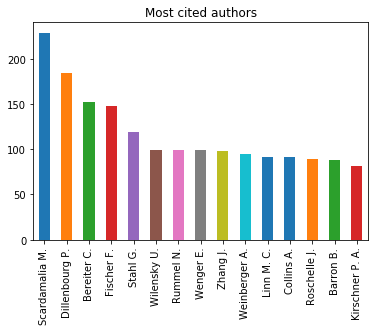

In [11]:
plt.title('Most cited authors')
reference_authors.author.value_counts().head(15).plot(kind='bar')

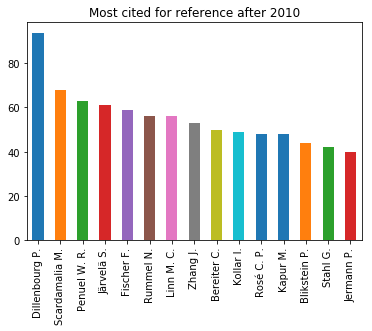

In [12]:
plt.title('Most cited for reference after 2010')
reference_authors[reference_authors.year > 2010].author.value_counts().head(15).plot(kind='bar')

We now merge on the shortened name as it can be found in the citation.

**Note** that we might get illegitemate merges, as the short name is not unique, even within the metadata dataset!

In [13]:
reference_edges = pd.merge(metadata, reference_authors, on='file')

reference_edges.sample(2)

,file,subject,iso,uri,type,publisher,title,issued,accessioned,citation,available,abstract,long_name,author_order,shortend_names,ref,ref_parsed,year,identifier,author
59340,import2015short_1103,"['design issues', 'classroom technology', 'col...",en,https://doi.dx.org/10.22318/cscl2015.1103,Book chapter,International Society of the Learning Science...,Researching and Designing for the Orchestratio...,2015-07,2017-06-19 14:51:54+00:00,"Mercier, E., Fong, C., Cober, R., Slotta, J. D...",2017-06-19 14:51:54+00:00,Designing tools for teachers to orchestrate co...,"Israel, Maya",5,Israel M.,"Fong, C., Cober, R. M., Messina, R., Moher, T....","Fong, C., Cober, R. M., Messina, R., Moher, T....",2014.0,"Fong, C., Cober, R. M., Messina, R., Moher, T....",Moher T.
108550,import2018_282,"['Sociocultural theory', 'Multimodality', 'Age...",en,https://doi.dx.org/10.22318/cscl2018.1320,Book chapter,International Society of the Learning Science...,Unpacking signs of learning in complex social ...,2018-07,2018-11-04 23:27:28+00:00,"Adams, J. D., Barma, S., Vincent, M., Voyer, S...",2018-11-04 23:27:28+00:00,This structured poster session examines the de...,"Vincent, Marie-Caroline",2,Vincent M.,"Adams, J. D., & Gupta, P. (2017). Informal sci...","Adams, J. D., & Gupta, P. (2017)",2017.0,"Adams, J. D., & Gupta, P. (2017). Informal sci...",Adams J. D.


In [14]:
reference_edges.rename(columns={'shortend_names': 'author', 'author': 'cited'}, inplace=True)

#### Self citations:

In [15]:
reference_edges[reference_edges.author == reference_edges.cited].author.value_counts().head()

Zhang J.           53
Dillenbourg P.     48
Scardamalia M.     44
Rummel N.          43
Trausan-Matu S.    34
Name: author, dtype: int64

### Number of authors in and out of conference

In and out of conference citations, quick calculation:

In [16]:
print('Number of distinct authors ', len(reference_edges.author.unique()))
print('Number of distinct cited authors by some author in the conference ', len(reference_edges.cited.unique()))
print('Number of authors that where cited by an other author in the confernce :' , len(set(reference_edges.cited.tolist()).intersection(set(reference_edges.author.tolist()))))

Number of distinct authors  1892
Number of distinct cited authors by some author in the conference  13047
Number of authors that where cited by an other author in the confernce : 1009


In [17]:
reference_edges = reference_edges[['cited', 'author', 'year', 'ref']][reference_edges.year.notna()]

In [18]:
match_conference = ' JLS |Journal of the Learning Sciences|CSCL|ICLS|ijCSCL|Computer Supportted Collaborative Learning'
re.search(match_conference,' ICLS')

<re.Match object; span=(1, 5), match='ICLS'>

In [19]:
mask_c_s = reference_edges.ref.map(lambda x: True if re.search(match_conference, x) else False)

In [21]:
in_conference = set(reference_edges[mask_c_s].cited.unique())

We limit the range of years to get people that are still "active"

In [39]:
not_in_conference = list(set(reference_edges[reference_edges.year > 2010].cited) - in_conference.union(set(reference_edges.author)))

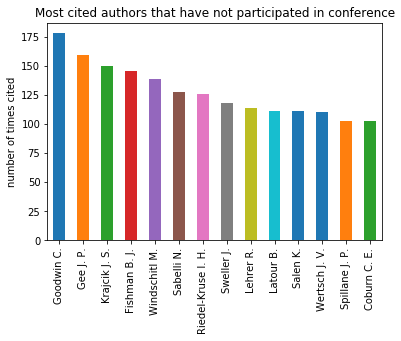

In [46]:
plt.title('Most cited authors that have not participated in conference')
plt.ylabel('number of times cited')
reference_edges[reference_edges.cited.isin(not_in_conference)].cited.value_counts().head(14).plot(kind = 'bar')

In [41]:
reference_edges[(reference_edges.cited.isin(not_in_conference)) & (reference_edges.cited == 'Goodwin C.')].ref.sample(4).tolist()

['Goodwin, C. (2007). Participation, stance and affect in the organization of activities. Discourse & Society, 18(1), 53-73.',
 'Goodwin, C. (2007). Participation, stance and affect in the organization of activities. Discourse & Society, 18(1, Special issue: Morality as family practice), 53–73.',
 'Goodwin, C., & Heritage, J. (1990). Conversation analysis. Annual review of anthropology, 19(1), 283-307.',
 'Goodwin, C. (1995). Seeing in depth. Social Studies of Science, 25, 237–274.']

In [42]:
reference_edges[(reference_edges.cited.isin(not_in_conference)) & (reference_edges.cited == 'Gee J. P.')].ref.sample(4).tolist()

['Gee, J. P., & Hayes, E. (2012). Nurturing affinity spaces and game-based learning. In C. Steinkuehler, K. Squire, & S. Barab (Eds.), Games, learning, and society: Learning and meaning in the digital age (pp. 129–153). New York, NY: Cambridge University Press.',
 'Gee, J. P. (2004). Language in the science classroom: Academic social languages as the heart of school-based literacy. In W. Saul (Ed.), Crossing Borders in Literacy and Science Instruction: Perspectives on Theory and Practice (pp. 13-32). Newark, DE: International Reading Association & National Science Teachers Association.',
 'Gee, J. P. (2004). Language in the science classroom: Academic social languages as the heart of school-based literacy. In W. Saul (Ed.), Crossing Borders in Literacy and Science Instruction: Perspectives on Theory and Practice (pp. 13-32). Newark, DE: International Reading Association & National Science Teachers Association.',
 'Gee, J. P. (2003). What Video Games Have to Teach Us About Learning and 

## References

In [47]:
references = pd.read_csv('data/References.csv', index_col=0)

In [48]:
references.ref.sample(5).tolist()

['Glaser, R. (1984). Education and thinking: The role of knowledge. American Psychologist, 39(2), 93-104',
 '* Etkina, E., Karelina, A., Ruibal-Villasenor, M., Rosengrant, D., Jordan, R., & Hmelo-Silver, C. E. (2010). Design and reflection help students develop scientific abilities: Learning in introductory physics laboratories. Journal of the Learning Sciences, 19, 54-98. doi:10.1080/10508400903452876',
 'Cochran, M. & Walker, S. (2005). Parenting and Personal Social Networks. In T. Luster and L. Ogakaki, Eds. Parenting: An Ecological Approach. Mahwah, NJ: Earlbaum.',
 'Vygotsky, L. S. (1978). Mind in society (M. Cole, V. John-Steiner, S. Scribner, & E. Souberman, Eds.): Cambridge, MA: Harvard University Press.',
 'So, W-M. W., Cheng, M.-H. M., Kong, S.-C., & Ching, N.-Y. F. (2014). Views of primary science teachers towards the use of online resources to support the implementation of inquiry learning. Education 3-13, 42(4), 386–401. https://doi.org/10.1080/03004279.2012.710640']

# Building the refrence graph:

directed graph weighted by number of times x cited y:

In [49]:
nodes = pd.DataFrame(reference_edges.author.drop_duplicates().reset_index(drop=True)).reset_index()

In [50]:
nodes.head()

,index,author
0,0,Abrahamson D.
1,1,Shayan S.
2,2,Bakker A.
3,3,Schaaf M. F.
4,4,DeLiema D.


In [65]:
edges = pd.merge(nodes, reference_edges, left_on='author', right_on='cited')

In [66]:
author_dict = nodes.author.to_dict()
author_dict = {v: k for k, v in author_dict.items()}

In [67]:
edges['author'] = edges.author_x.map(author_dict)
edges['citation'] = edges.author_y.map(author_dict)

In [69]:
n_nodes = len(nodes)
adjacency = np.zeros((n_nodes, n_nodes), dtype=int)

for idx, row in edges.iterrows():
    if np.isnan(row.author):
        continue
    i, j = int(row.author), int(row.citation)
    adjacency[j, i] += 1

In [70]:
adjacency.shape

(1892, 1892)

In [71]:
degrees = np.where(adjacency > 0, 1, 0).sum(axis=0)

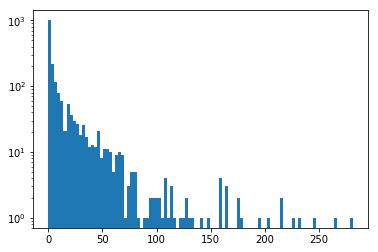

In [72]:
plt.hist(degrees, bins=100, log=True)
plt.show()

In [ ]:
import networkx as nx

graph = nx.from_numpy_array(adjacency)

mapping = nodes.author.to_dict()

H=nx.relabel_nodes(graph,mapping)
print(sorted(H.nodes()))

nx.write_gexf(H, 'data/refrence_graph.gexf')